In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

In [2]:
data_path = '../data/'
file_rice = 'rice.png'
file_woman = 'woman.png'

In [3]:
def print_images(list_of_images, size = 20):
    fig, ax = plt.subplots(1, len(list_of_images), figsize=(size,size))
    for i, (img,name) in enumerate(list_of_images):
        ax[i].set_title(str(name))
        ax[i].imshow(img, cmap='Greys_r');
        
def sharpen_img(image, blur):
    return image + (image - blur)

# Q.2 Edge Detection

## Q.2.2 Laplacian of Gaussian

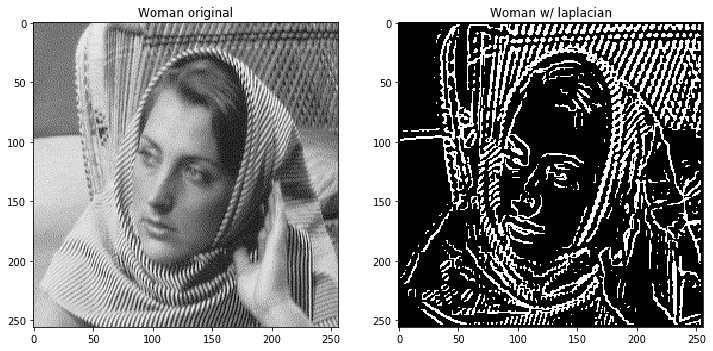

In [14]:
img_woman = cv2.imread(data_path + file_woman, cv2.COLOR_BGR2GRAY)

img_woman_filter_gaussian = cv2.GaussianBlur(img_woman, ksize = (5,5), sigmaX = np.sqrt(2))
laplacian_woman = cv2.Laplacian(img_woman_filter_gaussian, cv2.CV_8U, ksize = 5)



thr = np.amax(laplacian_woman)*0.75
laplacian_woman_zerocross = np.zeros(laplacian_woman.shape, dtype = np.uint8)
w, h = laplacian_woman.shape

for y in range(2, h - 2):
    for x in range(2, w - 2):
        patch = laplacian_woman[y-2:y+3, x-2:x+3]
        p = laplacian_woman[y, x]
        maxP, minP = patch.max(), patch.min()
        
        # check if difference larger than threshold and zero crossing
        if ((maxP - minP) > thr) and ((p > 0 and minP < 0) or (p <= 0 and maxP > 0)):
            laplacian_woman_zerocross[y, x] = 1


# Ploting images
print_images([(img_woman, 'Woman original'),
              (laplacian_woman_zerocross, 'Woman w/ laplacian')], 12)